## Data Analysis with Python

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.


Some questions we want to ask in this module
<ul>
    <li>do I know if the dealer is offering fair value for my trade-in?</li>
    <li>do I know if I put a fair value on my car?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
print ("Number of price data available :"+format(df.size))

Number of price data available :5829


In [4]:
print ("Number of Unique Makes available ")
#gk=df.groupby(['make'])
#gk.first()
df.groupby(['make']).size()

Number of Unique Makes available 


make
alfa-romero       3
audi              6
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             2
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           4
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
dtype: int64

In [5]:
print ("Number of Unique 'Body-styles' available ")

df.groupby(['body-style']).size()

Number of Unique 'Body-styles' available 


body-style
convertible     6
hardtop         8
hatchback      68
sedan          94
wagon          25
dtype: int64

In [6]:
#Find the mean Horsepower of the vehicles group by the type
df[['make', 'horsepower']].groupby(['make']).agg([ 'count', 'min', 'mean', 'max'])

horsepower                                    
                   count         min        mean         max
make                                                        
alfa-romero            3  111.000000  125.333333  154.000000
audi                   6  102.000000  114.500000  140.000000
bmw                    8  101.000000  138.875000  182.000000
chevrolet              3   48.000000   62.666667   70.000000
dodge                  9   68.000000   86.333333  145.000000
honda                 13   58.000000   80.230769  101.000000
isuzu                  2   78.000000   84.000000   90.000000
jaguar                 3  176.000000  204.666667  262.000000
mazda                 17   64.000000   85.529412  135.000000
mercedes-benz          8  123.000000  146.250000  184.000000
mercury                1  175.000000  175.000000  175.000000
mitsubishi            13   68.000000  104.076923  145.000000
nissan                18   55.000000  102.555556  200.000000
peugot                11   95.000000   99.818182  142.000000
plymouth               7   68.000000   86.714286  145.000000
porsche                4  143.000000  191.000000  207.000000
renault                2  104.256158  104.256158  104.256158
saab                   6  110.000000  126.666667  160.000000
subaru                12   69.000000   86.250000  111.000000
toyota                32   56.000000   92.781250  161.000000
volkswagen            12   52.000000   81.083333  110.000000
volvo                 11  106.000000  128.000000  162.000000

## Linear Regression to find the price 

### load the modules for linear regression

In [7]:
from sklearn.linear_model import LinearRegression

#### Create the linear regression object

In [8]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### How could Highway-mpg help us predict car price?
#### For this example, we want to look at how highway-mpg can help us predict car price. 
#### Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [9]:
X = df[['highway-mpg']]
Y = df['price']

#Fit the linear model using highway-mpg.
lm.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
print('Predicted Intercept {} and slope {}'.format(lm.intercept_, lm.coef_))

Predicted Intercept 38423.305858157386 and slope [-821.73337832]


## Multiple Linear Regression

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>length</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [12]:
# Do some exploratory Data Analysis between the parameters
# Find the Pearson Correlation between the parameters
dfTemp = df[['horsepower', 'length', 'curb-weight', 'engine-size', 'highway-mpg', 'price']]
dfTemp.corr(method="pearson")

,horsepower,length,curb-weight,engine-size,highway-mpg,price
horsepower,1.000000,0.579821,0.757976,0.822676,-0.804575,0.809575
length,0.579821,1.000000,0.880665,0.685025,-0.698142,0.690628
curb-weight,0.757976,0.880665,1.000000,0.849072,-0.794889,0.834415
engine-size,0.822676,0.685025,0.849072,1.000000,-0.679571,0.872335
highway-mpg,-0.804575,-0.698142,-0.794889,-0.679571,1.000000,-0.704692
price,0.809575,0.690628,0.834415,0.872335,-0.704692,1.000000


<p>From the above Pearson Correlation we see that  <b>price</b> could be influenced by </p>
<ul>
    <li>Horsepower : Positively : More Horsepower means more price</li>
    <li>length : Positively : People like bigger cars. The bigger the length of car, the bigger price it can fetch</li>
    <li>Curb-weight : Positively :</li>
    <li>Engine-size : Positively :</li>
    <li>Highway-mpg : Negatively :</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [13]:
Z = df[['horsepower', 'length', 'curb-weight', 'engine-size', 'highway-mpg']]

In [14]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lm.intercept_

-17700.93092591457

In [16]:
lm.coef_

array([  54.61340102, 3044.58194973,    4.35055082,   81.86930878,
         39.31129118])

### The equation derised via linear regression is as below

<b>Price</b> = -17700.93092591457 + 54.61340102 x <b>horsepower</b> +3044.58194973 x <b>length</b> +  4.35055082 x <b>curb-weight</b> + 81.86930878 x <b>engine-size</b> + 39.31129118 x <b>highway-mpg</b>

## Model Evaluation through Visualization

In [17]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

#### Let's visualize Horsepower as potential predictor variable of price:

(0, 49366.56216731044)

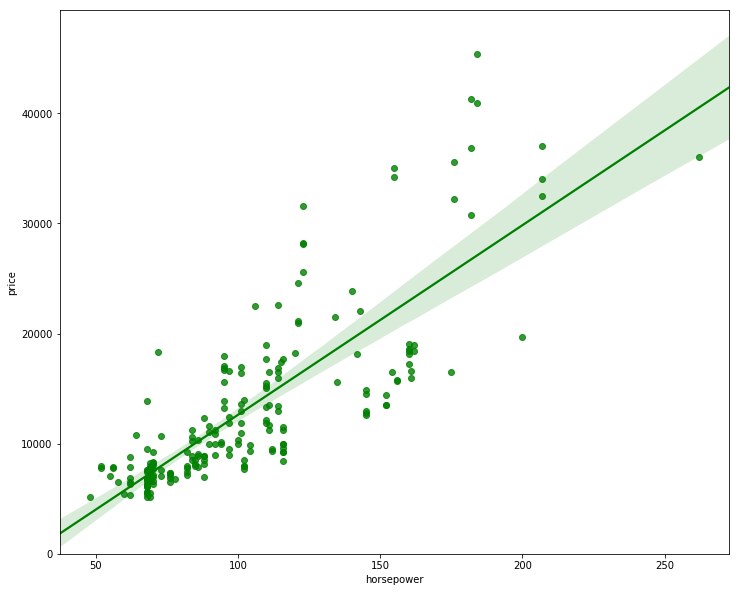

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price", color='green', data=df)
plt.ylim(0,)

Let's visualize Highway-mpg as potential predictor variable of price:

(0, 48258.35225686963)

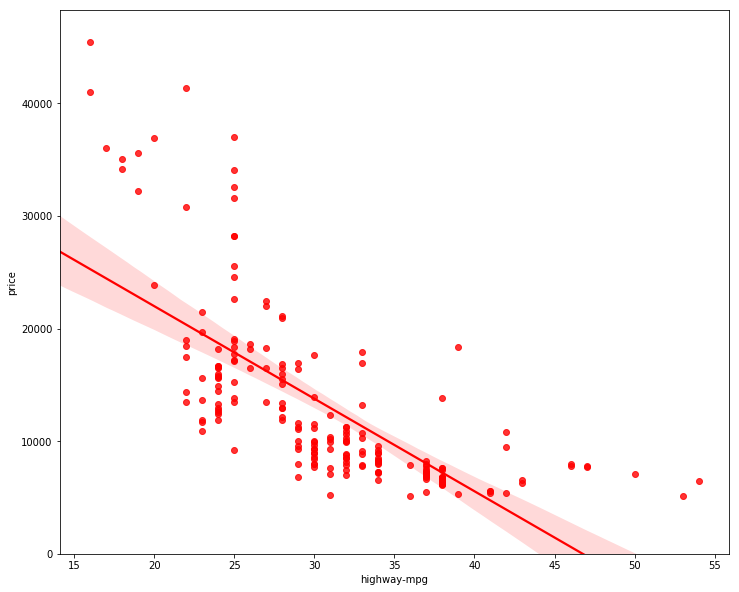

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", color='red', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. 

Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

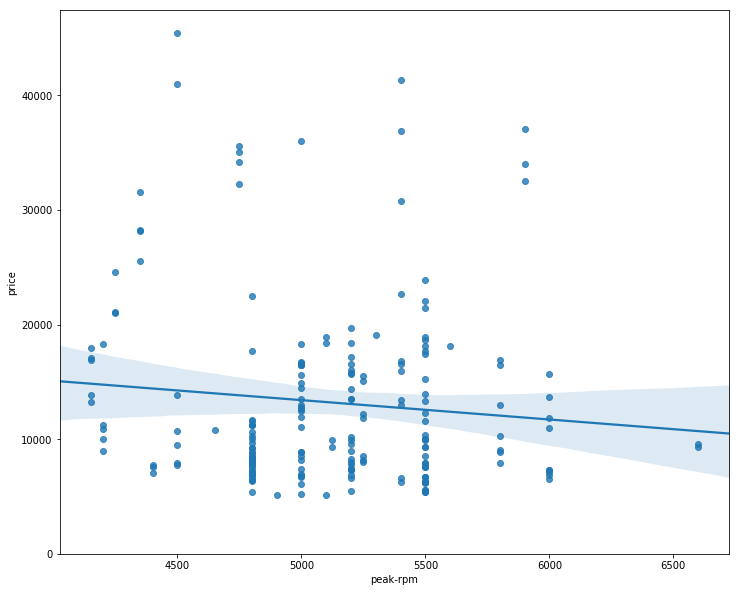

In [20]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

## Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

residual:
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

residual plot:

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

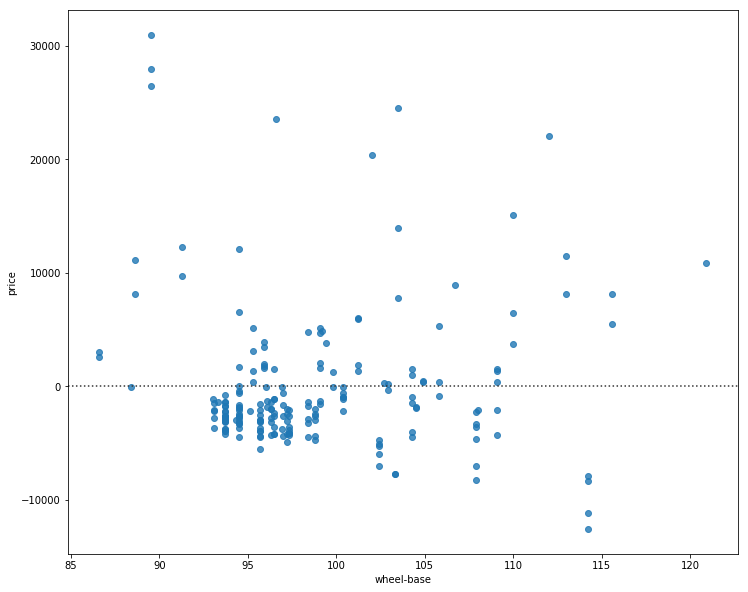

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
#sns.residplot(df['highway-mpg'], df['price'])
sns.residplot(df['wheel-base'], df['price'])
plt.show()

## Multiple Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because we can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction

In [22]:
Yhat = lm.predict(Z)

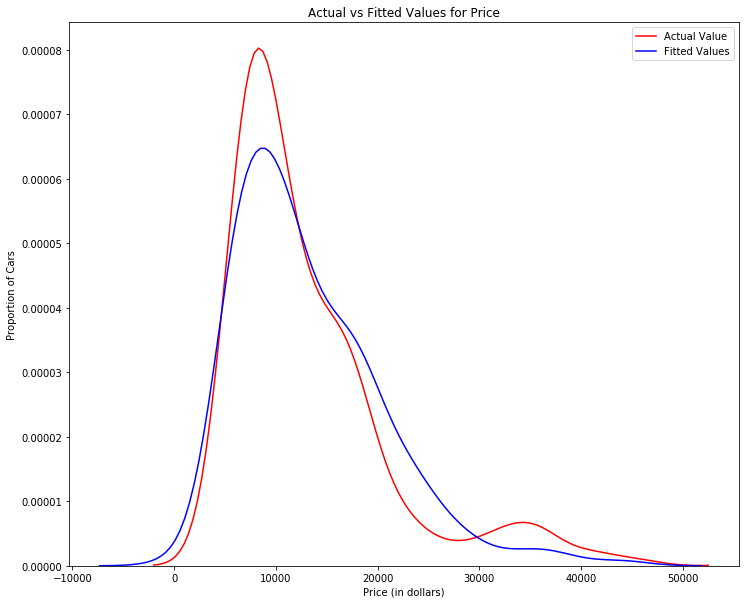

In [23]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression

#### A linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [24]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')

    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [25]:
x = df['highway-mpg']
y = df['price']

Fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [26]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)

         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


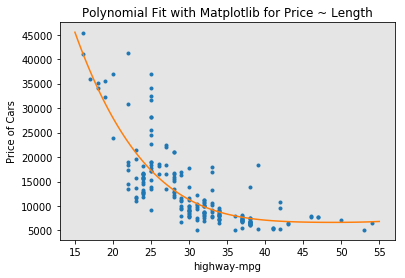

In [27]:
PlotPolly(p, x, y, 'highway-mpg')

We can perform a polynomial transform on multiple features. First, we import the module:

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
#Create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [30]:
Z_pr=pr.fit_transform(Z)

## Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [33]:
pipe=Pipeline(Input)

In [34]:
pipe.fit(Z,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [35]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([12526.65500365, 12526.65500365, 16130.7046355 , 11641.94693877])

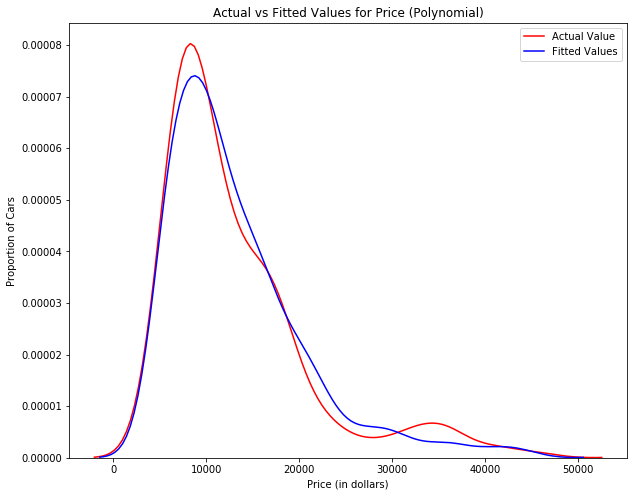

In [36]:
plt.figure(figsize=(10, 8))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price (Polynomial)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Comparing the outcomes of the three predicting models used. Here we shall not use visual tools ; rather we will prove mathematically which one is better
### We do this using the R^2 and Mean Squared Error (MSE)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
#Create a Dataframe to store the results of different model so as to make a comparative study
ColumnNames=['Model-Name', 'R-Squared', 'MSE']
DfModelEvaluation = pd.DataFrame(columns=ColumnNames)

In [39]:
DfModelEvaluation
Y=df['price'] #Actual Price

In [40]:
#highway_mpg_fit
X_HgwMpg = df[['highway-mpg']]
lm.fit(X_HgwMpg, Y)
# Find the R^2

Yhat_HgwMpg=lm.predict(X_HgwMpg)

RSq_HgwMpg = lm.score(X_HgwMpg, Y)

mse = mean_squared_error(df['price'], Yhat_HgwMpg)
DfModelEvaluation = DfModelEvaluation.append({'Model-Name': 'Linear-Regression: Highway-MPG', 'R-Squared': RSq_HgwMpg , 'MSE':mse}, ignore_index=True)
DfModelEvaluation

,Model-Name,R-Squared,MSE
0,Linear-Regression: Highway-MPG,0.496591,3.163504e+07


In [41]:
#horsepower_fit
X_Horsepower = df[['horsepower']]
lm.fit(X_Horsepower, Y)
# Find the R^2

Yhat_Horsepower=lm.predict(X_Horsepower)

RSq_Horsepower = lm.score(X_Horsepower, Y)

mse = mean_squared_error(df['price'], Yhat_Horsepower)
DfModelEvaluation = DfModelEvaluation.append({'Model-Name': 'Linear-Regression: Horsepower', 'R-Squared': RSq_Horsepower , 'MSE':mse}, ignore_index=True)


In [42]:
lm.fit(Z, df['price'])
Yhat_MultLinear=lm.predict(Z)
RSq_MultLiner = lm.score(Z, Y)

mse = mean_squared_error(Y, Yhat_MultLinear)
DfModelEvaluation = DfModelEvaluation.append({'Model-Name': 'MultiLinear-Regression: ', 'R-Squared': RSq_MultLiner , 'MSE':mse}, ignore_index=True)


In [43]:
from sklearn.metrics import r2_score

RSq_PolyHgw = r2_score(Y, p(x))
mse = mean_squared_error(Y, p(x))
DfModelEvaluation = DfModelEvaluation.append({'Model-Name': 'Poly-Order-4-Highway-MPG: ', 'R-Squared': RSq_PolyHgw , 'MSE':mse}, ignore_index=True)
DfModelEvaluation

,Model-Name,R-Squared,MSE
0,Linear-Regression: Highway-MPG,0.496591,3.163504e+07
1,Linear-Regression: Horsepower,0.655411,2.165454e+07
2,MultiLinear-Regression:,0.809459,1.197392e+07
3,Poly-Order-4-Highway-MPG:,0.674841,2.043356e+07


### From the Above Table, the conclusion is that the best-fit is Multi-Linear Regression